# Artificial Intelligence Nanodegree
## Machine Translation Project
In this notebook, sections that end with **'(IMPLEMENTATION)'** in the header indicate that the following blocks of code will require additional functionality which you must provide. Please be sure to read the instructions carefully!

## Introduction
In this notebook, you will build a deep neural network that functions as part of an end-to-end machine translation pipeline. Your completed pipeline will accept English text as input and return the French translation.

- **Preprocess** - You'll convert text to sequence of integers.
- **Models** Create models which accepts a sequence of integers as input and returns a probability distribution over possible translations. After learning about the basic types of neural networks that are often used for machine translation, you will engage in your own investigations, to design your own model!
- **Prediction** Run the model on English text.

## Dataset
We begin by investigating the dataset that will be used to train and evaluate your pipeline.  The most common datasets used for machine translation are from [WMT](http://www.statmt.org/).  However, that will take a long time to train a neural network on.  We'll be using a dataset we created for this project that contains a small vocabulary.  You'll be able to train your model in a reasonable time with this dataset.
### Load Data
The data is located in `data/small_vocab_en` and `data/small_vocab_fr`. The `small_vocab_en` file contains English sentences with their French translations in the `small_vocab_fr` file. Load the English and French data from these files from running the cell below.

In [23]:
# if set to true will cause all the models to be re-trained
# if set to false, models will be loaded from weight files (if available)
retrain_models = True
#retrain_models = True


In [2]:
from IPython.core.display import display, HTML

def make_page_wide():
    display(HTML("<style>.container { width:100% !important; }</style>"))

make_page_wide()

In [3]:
import helper

import keras

# Load English data
english_sentences = helper.load_data('data/small_vocab_en')
# Load French data
french_sentences = helper.load_data('data/small_vocab_fr')

#print(french_sentences[0:5])
print('Dataset Loaded')

Using TensorFlow backend.


Dataset Loaded


### Files
Each line in `small_vocab_en` contains an English sentence with the respective translation in each line of `small_vocab_fr`.  View the first two lines from each file.

In [4]:
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, french_sentences[sample_i]))

small_vocab_en Line 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
small_vocab_fr Line 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en Line 2:  the united states is usually chilly during july , and it is usually freezing in november .
small_vocab_fr Line 2:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


From looking at the sentences, you can see they have been preprocessed already.  The puncuations have been delimited using spaces. All the text have been converted to lowercase.  This should save you some time, but the text requires more preprocessing.
### Vocabulary
The complexity of the problem is determined by the complexity of the vocabulary.  A more complex vocabulary is a more complex problem.  Let's look at the complexity of the dataset we'll be working with.

In [5]:
import collections


english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentences for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentences for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


For comparison, _Alice's Adventures in Wonderland_ contains 2,766 unique words of a total of 15,500 words.
## Preprocess
For this project, you won't use text data as input to your model. Instead, you'll convert the text into sequences of integers using the following preprocess methods:
1. Tokenize the words into ids
2. Add padding to make all the sequences the same length.

Time to start preprocessing the data...
### Tokenize (IMPLEMENTATION)
For a neural network to predict on text data, it first has to be turned into data it can understand. Text data like "dog" is a sequence of ASCII character encodings.  Since a neural network is a series of multiplication and addition operations, the input data needs to be number(s).

We can turn each character into a number or each word into a number.  These are called character and word ids, respectively.  Character ids are used for character level models that generate text predictions for each character.  A word level model uses word ids that generate text predictions for each word.  Word level models tend to learn better, since they are lower in complexity, so we'll use those.

Turn each sentence into a sequence of words ids using Keras's [`Tokenizer`](https://keras.io/preprocessing/text/#tokenizer) function. Use this function to tokenize `english_sentences` and `french_sentences` in the cell below.

Running the cell will run `tokenize` on sample data and show output for debugging.

In [6]:
import project_tests as tests
from keras.preprocessing.text import Tokenizer


def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    # TODO: Implement
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    #print(tokenizer.word_index)
    sequences = tokenizer.texts_to_sequences(x)
    
    return sequences, tokenizer

tests.test_tokenize(tokenize)

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'is': 19, 'won': 16, 'lexicography': 15, 'quick': 2, 'lazy': 8, 'sentence': 21, 'over': 7, 'dog': 9, 'prize': 17, 'jove': 11, 'my': 12, 'fox': 5, 'of': 14, 'short': 20, 'jumps': 6, 'a': 3, 'by': 10, 'this': 18, 'the': 1, 'study': 13, 'brown': 4}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


### Padding (IMPLEMENTATION)
When batching the sequence of word ids together, each sequence needs to be the same length.  Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

Make sure all the English sequences have the same length and all the French sequences have the same length by adding padding to the **end** of each sequence using Keras's [`pad_sequences`](https://keras.io/preprocessing/sequence/#pad_sequences) function.

In [7]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences


def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    padded_ar = pad_sequences(x, maxlen=length, padding='post', truncating='post')
#     print(padded_ar)
    return padded_ar
tests.test_pad(pad)

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


### Preprocess Pipeline
Your focus for this project is to build neural network architecture, so we won't ask you to create a preprocess pipeline.  Instead, we've provided you with the implementation of the `preprocess` function.

In [8]:
print(english_sentences[1])
print(french_sentences[1])

the united states is usually chilly during july , and it is usually freezing in november .
les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


In [9]:
def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    
    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    preprocess(english_sentences, french_sentences)


print('Data Preprocessed')

Data Preprocessed


In [10]:
# tmp_x = None
# tmp_y = None
tmp_x, tmp_x_tk = tokenize(english_sentences)
tmp_y, tmp_y_tk = tokenize(french_sentences)


In [11]:
print(english_sentences[1])
print(french_sentences[1])

print(preproc_english_sentences.shape)
print(preproc_french_sentences.shape)

max_len_e, idx_max_len_e = max([ (len(s), index) for (index,s) in enumerate(tmp_x)])
max_len_f, idx_max_len_f = max([ (len(s), index) for (index,s) in enumerate(tmp_y)])

print("longest english sentence: len={max_len_e}, idx={idx_max_len_e}".format(max_len_e=max_len_e, idx_max_len_e=idx_max_len_e))
print(tmp_x[idx_max_len_e])
print(english_sentences[idx_max_len_e])
print(french_sentences[idx_max_len_e])

print("longest frenech sentence: len={max_len_f}, idx={idx_max_len_f}".format(max_len_f=max_len_f, idx_max_len_f=idx_max_len_f))
print(tmp_y[idx_max_len_f])
print(english_sentences[idx_max_len_f])
print(french_sentences[idx_max_len_f])

the united states is usually chilly during july , and it is usually freezing in november .
les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .
(137861, 15)
(137861, 21, 1)
longest english sentence: len=15, idx=137834
[5, 20, 21, 1, 9, 62, 4, 36, 6, 3, 1, 10, 65, 2, 48]
the united states is usually chilly during january , but it is never wet in february .
les états-unis est généralement froid en janvier , mais il est jamais humide en février .
longest frenech sentence: len=21, idx=123825
[4, 32, 31, 1, 9, 26, 63, 15, 111, 22, 11, 24, 5, 3, 105, 103, 9, 19, 26, 11, 24]
the united states is never dry during autumn , but it is never cold in fall .
les états-unis est jamais à sec au cours de l' automne , mais il ne fait jamais froid à l' automne .


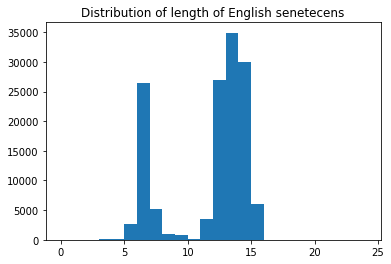

In [14]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#distribution of length of english senetecens
plt.hist([len(s) for s in tmp_x], bins=range(25))
plt.title("Distribution of length of English senetecens")
plt.show()

Text(0.5,1,'Distribution of length of French sentences')

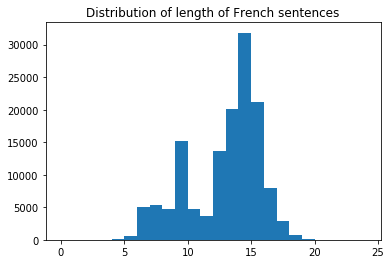

In [15]:
# dsitribution of length of french sentences
plt.hist([len(s) for s in tmp_y], bins=range(25))
plt.title("Distribution of length of French sentences")

## Models
In this section, you will experiment with various neural network architectures.
You will begin by training four relatively simple architectures.
- Model 1 is a simple RNN
- Model 2 is a RNN with Embedding
- Model 3 is a Bidirectional RNN
- Model 4 is an optional Encoder-Decoder RNN

After experimenting with the four simple architectures, you will construct a deeper architecture that is designed to outperform all four models.
### Ids Back to Text
The neural network will be translating the input to words ids, which isn't the final form we want.  We want the French translation.  The function `logits_to_text` will bridge the gab between the logits from the neural network to the French translation.  You'll be using this function to better understand the output of the neural network.

In [16]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


In [19]:
import random

# I will use this function to print random sentences translated by the models below
def print_translations(model, x, y, y_tk, how_many=5, indexes=[]):
    try:
        how_many = int(how_many)
    except ValueError:
        how_many = 5
        
    if type(indexes)!=list or len(indexes)==0:
        indexes = random.sample(range(1, len(x)), how_many)
        
    for idx in indexes:
        print("english: {}".format(x[idx]))
        predictions = model.predict(y[idx:idx+1])
        for prediction_idx in range(predictions.shape[0]):
            print("french:  {pred}".format(prediction_idx=prediction_idx, pred=logits_to_text(predictions[prediction_idx], y_tk)))
        print()
    

In [20]:
from keras.callbacks import ModelCheckpoint

def create_checkpoint_callback(filename):
    return ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True)

### Model 1: RNN (IMPLEMENTATION)
![RNN](images/rnn.png)
A basic RNN model is a good baseline for sequence data.  In this model, you'll build a RNN that translates English to French.

In [31]:
from keras.layers import GRU, Input, Dense, TimeDistributed
from keras.models import Model
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy


def simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Build the layers
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))
    
    
    input_sequences = Input(shape=(21,1), name='input_layer')
    
    #gru = GRU(units=french_vocab_size+1, return_sequences=True, name='gru_layer')(input_sequences)
    #predictions = TimeDistributed(Dense(units=french_vocab_size+1, input_shape=(21,french_vocab_size+1), name='dense_td'), name='time_distributed')(gru)
    #model = Model(inputs = input_sequences, outputs=predictions)
    
    #gru = GRU(units=french_vocab_size+1, return_sequences=True, name='gru_layer')(input_sequences)
    gru = GRU(units=200, return_sequences=True, name='gru_layer')(input_sequences)
    #predictions = TimeDistributed(Dense(units=french_vocab_size+1, input_shape=(21,french_vocab_size+1), name='dense_td'), name='time_distributed')(gru)
    predictions=Dense(french_vocab_size, activation='softmax', name='prediction_layer')(gru)
    model = Model(inputs = input_sequences, outputs=predictions)
    
    learning_rate=0.05
    model.compile(loss=sparse_categorical_crossentropy,
                 optimizer=Adam(learning_rate),
                 metrics=['accuracy'])
#     print( model.summary())
    return model

tests.test_simple_model(simple_model)

# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))

# Train the neural network
simple_rnn_model = simple_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index),
    len(french_tokenizer.word_index))

print(simple_rnn_model.summary())

input_shape=(137861, 21, 1)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
input_shape=(137861, 21, 1)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 21, 1)             0         
_________________________________________________________________
gru_layer (GRU)              (None, 21, 200)           121200    
_________________________________________________________________
prediction_layer (Dense)     (None, 21, 344)           69144     
Total params: 190,344
Trainable params: 190,344
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
simple_rnn_is_fit = False
try:
    simple_rnn_model.load_weights('model_simple.hdf5')
    print('model loaded and ready to use')
    simple_rnn_is_fit = True
except OSError:
    print('model needs trainig')
except ValueError:
    print('different model, needs training')


model loaded and ready to use


In [32]:
if not simple_rnn_is_fit or retrain_models:
    simple_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=20, validation_split=0.2, \
                         callbacks=[create_checkpoint_callback('model_simple.hdf5')])

# Print prediction(s)
print(english_sentences[0])
print(logits_to_text(simple_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

Train on 110288 samples, validate on 27573 samples
Epoch 1/20
110288/110288 [==============================] - 11s - loss: 1.6907 - acc: 0.5874 - val_loss: nan - val_acc: 0.6535
Epoch 2/20
110288/110288 [==============================] - 10s - loss: 1.1483 - acc: 0.6572 - val_loss: nan - val_acc: 0.6648
Epoch 3/20
110288/110288 [==============================] - 10s - loss: 1.0686 - acc: 0.6666 - val_loss: nan - val_acc: 0.6646
Epoch 4/20
110288/110288 [==============================] - 10s - loss: 1.0160 - acc: 0.6756 - val_loss: nan - val_acc: 0.6839
Epoch 5/20
110288/110288 [==============================] - 10s - loss: 0.9690 - acc: 0.6855 - val_loss: nan - val_acc: 0.6720
Epoch 6/20
110288/110288 [==============================] - 10s - loss: 0.9548 - acc: 0.6899 - val_loss: nan - val_acc: 0.6897
Epoch 7/20
110288/110288 [==============================] - 10s - loss: 0.9489 - acc: 0.6920 - val_loss: nan - val_acc: 0.6876
Epoch 8/20
110288/110288 [==============================] - 

In [33]:
print_translations(simple_rnn_model, english_sentences, tmp_x, french_tokenizer)

english: china is usually wonderful during august , but it is sometimes cold in october .
french:  chine est est généralement merveilleux mois mois d' août il est est froid en octobre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: she liked a big yellow truck .
french:  elle aimait cette voiture voiture voiture <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: she dislikes strawberries , grapes , and peaches .
french:  elle déteste les oranges les citrons et les mangues <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: india is never dry during winter , but it is sometimes rainy in fall .
french:  l' inde est jamais sec pendant l' mais mais il parfois pluvieux à l' <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: he likes oranges , grapes , and peaches .
french:  elle aime les oranges les citrons et les mangues <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>



### Model 2: Embedding (IMPLEMENTATION)
![RNN](images/embedding.png)
You've turned the words into ids, but there's a better representation of a word.  This is called word embeddings.  An embedding is a vector representation of the word that is close to similar words in n-dimensional space, where the n represents the size of the embedding vectors.

In this model, you'll create a RNN model using embedding.

In [51]:
from keras.layers.embeddings import Embedding
from keras.models import Sequential

def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))

    dim_embedding = 128
    gru_hidden_state_dim = 100
    
    model=Sequential()
    model.add(Embedding(input_dim=english_vocab_size, output_dim=dim_embedding, input_length=input_shape[-1], name='embedding_layer' ))
    model.add(GRU(units=gru_hidden_state_dim, return_sequences=True, name='gru_layer'))
    model.add(Dense(french_vocab_size, activation='softmax', name='clasification_layer'))
    
    learning_rate = 0.01
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    
    return model

tests.test_embed_model(embed_model)

tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])

# Train the neural network
embed_rnn_model = embed_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

print(embed_rnn_model.summary())

input_shape=(137861, 21)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
input_shape=(137861, 21)
output_sequence_length=21
english_vocab_size=200
french_vocab_size=345
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 21, 128)           25600     
_________________________________________________________________
gru_layer (GRU)              (None, 21, 100)           68700     
_________________________________________________________________
clasification_layer (Dense)  (None, 21, 345)           34845     
Total params: 129,145
Trainable params: 129,145
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
embed_rnn_is_fit = False
try:
    embed_rnn_model.load_weights('model_embed.hdf5')
    print('model loaded and ready to use')
    embed_rnn_is_fit = True
except OSError:
    print('model needs trainig')
except ValueError:
    print('different model, needs training')

model loaded and ready to use


In [53]:

if not embed_rnn_is_fit or retrain_models:
    embed_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, callbacks=[create_checkpoint_callback('model_embed.hdf5')], epochs=20, validation_split=0.2)


Train on 110288 samples, validate on 27573 samples
Epoch 1/20
110288/110288 [==============================] - 9s - loss: 0.4871 - acc: 0.8508 - val_loss: 0.4828 - val_acc: 0.8519
Epoch 2/20
110288/110288 [==============================] - 8s - loss: 0.4763 - acc: 0.8539 - val_loss: 0.4777 - val_acc: 0.8545
Epoch 3/20
110288/110288 [==============================] - 8s - loss: 0.4697 - acc: 0.8555 - val_loss: 0.4716 - val_acc: 0.8555
Epoch 4/20
110288/110288 [==============================] - 8s - loss: 0.4666 - acc: 0.8567 - val_loss: 0.4728 - val_acc: 0.8555
Epoch 5/20
110288/110288 [==============================] - 8s - loss: 0.4626 - acc: 0.8578 - val_loss: 0.4675 - val_acc: 0.8573
Epoch 6/20
110288/110288 [==============================] - 8s - loss: 0.4602 - acc: 0.8584 - val_loss: 0.4671 - val_acc: 0.8570
Epoch 7/20
110288/110288 [==============================] - 8s - loss: 0.4575 - acc: 0.8593 - val_loss: 0.4606 - val_acc: 0.8590
Epoch 8/20
110288/110288 [====================

In [54]:
print_translations(embed_rnn_model, english_sentences, tmp_x, french_tokenizer)

english: the united states is usually freezing during may , but it is never nice in november .
french:  les états unis est généralement gel habituellement mois mois de mai mais jamais est agréable en novembre <PAD> <PAD> <PAD> <PAD>

english: india is wonderful during october , but it is never beautiful in august .
french:  l' inde est merveilleux en octobre mais il est jamais beau en août <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: i think translating between english and spanish is easy .
french:  je pense que la traduction entre espagnol espagnol espagnol et anglais anglais facile <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: new jersey is sometimes rainy during january , and it is sometimes mild in october .
french:  new jersey est parfois pluvieux en janvier et il est parfois doux en octobre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: india is mild during august , but it is never busy in december .
french:  l' inde jamais doux au mois d' août mais 

### Model 3: Bidirectional RNNs (IMPLEMENTATION)
![RNN](images/bidirectional.png)
One restriction of a RNN is that it can't see the future input, only the past.  This is where bidirectional recurrent neural networks come in.  They are able to see the future data.

In [58]:
from keras.layers import Bidirectional, Dropout
from keras.layers import Reshape


def bd_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a bidirectional RNN model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement
    
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))
    print("switching to input size={}".format(input_shape[1]))
    hyper_dim_embedding = 128
    hyper_hid_size = 100
    
    model=Sequential()
    model.add(Reshape(target_shape=(input_shape[1],), input_shape= input_shape[1:], name='reshape_layer' ))
    model.add(Embedding(input_dim=english_vocab_size, output_dim=hyper_dim_embedding, input_length=21, name='embedding_layer' ))
    
    #model.add(Bidirectional(GRU(output_sequence_length, return_sequences=True, name='gru_layer'), name='bidi_gru', merge_mode='concat'))
    model.add(Bidirectional(GRU(hyper_hid_size, return_sequences=True, name='gru_layer'), name='bidi_gru', merge_mode='concat'))
    #model.add(Dropout(0.25, name='dropout'))
    model.add(Dense(units=french_vocab_size, activation='softmax', name='clasification_layer'))
    
    learning_rate = 0.01
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    
    return model

tests.test_bd_model(bd_model)

# TODO: Train and Print prediction(s)
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
#tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))

# Train the neural network
bd_rnn_model = bd_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

print(bd_rnn_model.summary())

input_shape=(137861, 21, 1)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
switching to input size=21
input_shape=(137861, 21)
output_sequence_length=21
english_vocab_size=200
french_vocab_size=345
switching to input size=21
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_layer (Reshape)      (None, 21)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 21, 128)           25600     
_________________________________________________________________
bidi_gru (Bidirectional)     (None, 21, 200)           137400    
_________________________________________________________________
clasification_layer (Dense)  (None, 21, 345)           69345     
Total params: 232,345
Trainable params: 232,345
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
bd_rnn_is_fit = False
try:
    bd_rnn_model.load_weights('model_bd.hdf5')
    print('model loaded and ready to use')
    bd_rnn_is_fit = True
except OSError:
    print('model needs trainig')
except ValueError:
    print('different model, needs training')

different model, needs training


In [62]:
bd_rnn_is_fit = False
if not bd_rnn_is_fit or retrain_models:
    bd_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=20, validation_split=0.2, callbacks=[create_checkpoint_callback('model_bd.hdf5')])
    bd_rnn_is_fit = True
    
# Print prediction(s)
print(logits_to_text(bd_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 13s - loss: 0.0861 - acc: 0.9744 - val_loss: 0.1004 - val_acc: 0.9713
Epoch 2/10
110288/110288 [==============================] - 13s - loss: 0.0811 - acc: 0.9760 - val_loss: 0.1026 - val_acc: 0.9708
Epoch 3/10
110288/110288 [==============================] - 13s - loss: 0.0845 - acc: 0.9748 - val_loss: 0.1036 - val_acc: 0.9701
Epoch 4/10
110288/110288 [==============================] - 13s - loss: 0.0827 - acc: 0.9752 - val_loss: 0.0947 - val_acc: 0.9734
Epoch 5/10
110288/110288 [==============================] - 13s - loss: 0.0807 - acc: 0.9761 - val_loss: 0.1073 - val_acc: 0.9691
Epoch 6/10
110288/110288 [==============================] - 13s - loss: 0.0879 - acc: 0.9739 - val_loss: 0.1050 - val_acc: 0.9703
Epoch 7/10
110288/110288 [==============================] - 13s - loss: 0.0848 - acc: 0.9749 - val_loss: 0.1138 - val_acc: 0.9679
Epoch 8/10
110288/110288 [=============

In [63]:
print_translations(bd_rnn_model, english_sentences, tmp_x, french_tokenizer)

english: she likes bananas , grapes , and peaches .
french:  elle aime les bananes les raisins et les pêches <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: china is never wonderful during summer , but it is sometimes cold in may .
french:  chine est jamais merveilleux pendant l' été mais il est parfois froid en mai <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: he dislikes grapes , bananas , and mangoes.
french:  il aime pas les raisins les bananes et les mangues <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: china is busy during april , and it is usually wet in november .
french:  chine est occupé en avril et il est généralement humide en novembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: he likes lemons , grapes , and limes.
french:  il aime les citrons les raisins et citrons verts <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>



### Model 4: Encoder-Decoder (OPTIONAL)
Time to look at encoder-decoder models.  This model is made up of an encoder and decoder. The encoder creates a matrix representation of the sentence.  The decoder takes this matrix as input and predicts the translation as output.

Create an encoder-decoder model in the cell below.

In [64]:
from keras.layers import RepeatVector
from keras.layers import LSTM

def encdec_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train an encoder-decoder model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))
    print("switching to input size={}".format(input_shape[1]))
    
    # hyper-parameters
    hyper_embed_size = 128
    hyper_hidden_size = 100
    learning_rate = 0.005
    
    model=Sequential()
    
    # build encoder network
    model.add(Reshape(target_shape=(input_shape[1],), input_shape= input_shape[1:], name='reshape_layer' ))
    model.add(Embedding(english_vocab_size, hyper_embed_size, input_shape=input_shape[2:], mask_zero=True, name='embedding_layer'))
    model.add(Bidirectional(GRU(hyper_hidden_size, name='lstm_encoder_layer')))
    model.add(Dense(hyper_hidden_size, activation='relu'))
    model.add(Dropout(0.2))
    model.add(RepeatVector(output_sequence_length, name='repeat_layer'))
    
    # decoder network
    model.add(Bidirectional(LSTM(hyper_hidden_size, return_sequences=True, name='lstm_decoder_layer')))
    #model.add(Dropout(0.2))
    model.add(TimeDistributed(Dense(hyper_hidden_size, activation='relu')))
    
    model.add(TimeDistributed(Dense(french_vocab_size, name='td_dense', activation='softmax')))
#     model.add(Activation('softmax'))
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model


tests.test_encdec_model(encdec_model)


# OPTIONAL: Train and Print prediction(s)
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
print("shape of tmp_x: {}".format(tmp_x.shape))
#tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))


# Train the neural network
encdec_model = encdec_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

print(encdec_model.summary())


input_shape=(137861, 15, 1)
output_sequence_length=21
english_vocab_size=199
french_vocab_size=344
switching to input size=15
shape of tmp_x: (137861, 21)
input_shape=(137861, 21)
output_sequence_length=21
english_vocab_size=200
french_vocab_size=345
switching to input size=21
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_layer (Reshape)      (None, 21)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 21, 128)           25600     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               137400    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0      

In [65]:
encdec_is_fit = False
try:
    encdec_model.load_weights('model_encdec.hdf5')
    print('model loaded and ready to use')
    encdec_is_fit = True
except OSError:
    print('model needs trainig')
except ValueError:
    print('different model, needs training')

different model, needs training


In [66]:
encdec_is_fit = False
if not encdec_is_fit or retrain_models:
    encdec_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=50, validation_split=0.2, callbacks=[create_checkpoint_callback('model_encdec.hdf5')])
    encdec_is_fit = True
# Print prediction(s)
print(logits_to_text(encdec_model.predict(tmp_x[:1])[0], french_tokenizer))

Train on 110288 samples, validate on 27573 samples
Epoch 1/50
110288/110288 [==============================] - 53s - loss: 2.2631 - acc: 0.5038 - val_loss: 1.5147 - val_acc: 0.5852
Epoch 2/50
110288/110288 [==============================] - 50s - loss: 1.3160 - acc: 0.6335 - val_loss: 1.0996 - val_acc: 0.6916
Epoch 3/50
110288/110288 [==============================] - 50s - loss: 0.9680 - acc: 0.7159 - val_loss: 0.8194 - val_acc: 0.7496
Epoch 4/50
110288/110288 [==============================] - 50s - loss: 0.7977 - acc: 0.7550 - val_loss: 0.6739 - val_acc: 0.7894
Epoch 5/50
110288/110288 [==============================] - 50s - loss: 0.6491 - acc: 0.7947 - val_loss: 0.5770 - val_acc: 0.8207
Epoch 6/50
110288/110288 [==============================] - 50s - loss: 0.5615 - acc: 0.8208 - val_loss: 0.4560 - val_acc: 0.8565
Epoch 7/50
110288/110288 [==============================] - 50s - loss: 0.4871 - acc: 0.8442 - val_loss: 0.3943 - val_acc: 0.8787
Epoch 8/50
110288/110288 [=============

110288/110288 [==============================] - 50s - loss: 0.1428 - acc: 0.9592 - val_loss: 0.1011 - val_acc: 0.9730
Epoch 29/50
110288/110288 [==============================] - 50s - loss: 0.1289 - acc: 0.9629 - val_loss: 0.0943 - val_acc: 0.9738
Epoch 30/50
110288/110288 [==============================] - 50s - loss: 0.1209 - acc: 0.9654 - val_loss: 0.1044 - val_acc: 0.9716
Epoch 31/50
110288/110288 [==============================] - 50s - loss: 0.1236 - acc: 0.9648 - val_loss: 0.0891 - val_acc: 0.9750
Epoch 32/50
110288/110288 [==============================] - 50s - loss: 0.1143 - acc: 0.9670 - val_loss: 0.0893 - val_acc: 0.9759
Epoch 33/50
110288/110288 [==============================] - 50s - loss: 0.1173 - acc: 0.9664 - val_loss: 0.0904 - val_acc: 0.9754
Epoch 34/50
110288/110288 [==============================] - 50s - loss: 0.1151 - acc: 0.9673 - val_loss: 0.1007 - val_acc: 0.9719
Epoch 35/50
110288/110288 [==============================] - 50s - loss: 0.1146 - acc: 0.9670 -

KeyboardInterrupt: 

In [67]:
# test some translations
print_translations(encdec_model, english_sentences, tmp_x, french_tokenizer)


english: she dislikes grapefruit , lemons , and bananas .
french:  elle n'aime pamplemousse citrons et et <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: india is usually mild during march , but it is quiet in may .
french:  l' inde est généralement doux en mars mais il est calme en mai <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: the united states is never snowy during december , and it is sometimes chilly in october .
french:  les états unis est jamais de neige en décembre et il est parfois frisquet en octobre <PAD> <PAD> <PAD> <PAD> <PAD>

english: the united states is never wet during fall , but it is never warm in june .
french:  les états unis est jamais humide à l'automne mais il est jamais chaud en juin <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: india is sometimes wonderful during september , and it is never freezing in spring .
french:  l' inde est parfois merveilleux en septembre et il gèle jamais au printemp

### Model 5: Custom (IMPLEMENTATION)
Use everything you learned from the previous models to create a model that incorporates embedding and a bidirectional rnn into one model.

In [81]:
from keras.models import Sequential
from keras.layers import RepeatVector, Dense, Reshape, Embedding, TimeDistributed, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

    
def model_final(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train an encoder-decoder model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    print("input_shape={}".format(input_shape))
    print("output_sequence_length={}".format(output_sequence_length))
    print("english_vocab_size={}".format(english_vocab_size))
    print("french_vocab_size={}".format(french_vocab_size))
    print("switching to input size={}".format(input_shape[1]))
    
    # hyper-parameters
    dim_embed = 128
    dim_hidden = 100
    learning_rate = 0.005
    hyper_dropout = 0.25
    
    # OPTIONAL: Implement
    model = Sequential()
   
    # build encoder network
    #model.add(Reshape(target_shape=(input_shape[1],1), input_shape= input_shape[1:], name='reshape_layer' ))
    model.add(Embedding(english_vocab_size, dim_embed, input_shape=input_shape[1:], mask_zero=True, name='embedding_layer'))
    #model.add(LSTM(dim_hidden, name='lstm_encoder_layer'))
    #model.add(RepeatVector(output_sequence_length, name='repeat_layer'))
    #model.add(TimeDistributed(GRU(units=output_sequence_length, return_sequences=True), name='bidi_gru_encoder'))
    
    # decoder network
    #model.add(LSTM(french_vocab_size, return_sequences=True, name='lstm_decoder_layer'))
    #model.add(TimeDistributed(GRU(units=output_sequence_length, return_sequences=False)))
    
#     model.add(TimeDistributed(Dense(french_vocab_size, activation="relu", name='td_dense'), name='td_dense_1'))
    #model.add(Dropout(hyper_dropout))
    #model.add(TimeDistributed(Dense(french_vocab_size, activation="relu", name='td_dense'), name='td_dense_2'))
    
    
#     model = Sequential()
    out_dim = 128
    model.add(Bidirectional(GRU(100, input_shape=input_shape, return_sequences=False))) # encoder
    model.add(RepeatVector(output_sequence_length)) # Get the last output of the GRU and repeats it
    model.add(GRU(out_dim, return_sequences=True)) # decoder
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax', name='activation_layer')))
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    print(model.summary())
    return model
#tests.test_model_final(model_final)



print('Final Model Loaded')
# TODO: Train neural network using model_final
tmp_x = pad(preproc_english_sentences, preproc_english_sentences.shape[-1])

# Train the neural network
final_model = model_final(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

print(final_model.summary())


Final Model Loaded
input_shape=(137861, 15)
output_sequence_length=21
english_vocab_size=200
french_vocab_size=345
switching to input size=15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 15, 128)           25600     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 200)               137400    
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 21, 200)           0         
_________________________________________________________________
gru_12 (GRU)                 (None, 21, 128)           126336    
_________________________________________________________________
time_distributed_10 (TimeDis (None, 21, 345)           44505     
Total params: 333,841
Trainable params: 333,841
Non-trainable params: 0
____________________________________________________________

In [82]:
final_is_fit = False
try:
    final_model.load_weights('model_final.hdf5')
    print('model loaded and ready to use')
    final_is_fit = True
except OSError:
    print('model needs trainig')
except ValueError:
    print('different model, needs training')

model loaded and ready to use


In [83]:
if not final_is_fit or retrain_models:
    final_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=20, validation_split=0.2, callbacks=[create_checkpoint_callback('model_final.hdf5')])



Train on 110288 samples, validate on 27573 samples
Epoch 1/20
110288/110288 [==============================] - 30s - loss: 0.1430 - acc: 0.9632 - val_loss: 0.1395 - val_acc: 0.9639
Epoch 2/20
110288/110288 [==============================] - 26s - loss: 0.1292 - acc: 0.9665 - val_loss: 0.1383 - val_acc: 0.9651
Epoch 3/20
110288/110288 [==============================] - 26s - loss: 0.1116 - acc: 0.9714 - val_loss: 0.1168 - val_acc: 0.9701
Epoch 4/20
110288/110288 [==============================] - 26s - loss: 0.1168 - acc: 0.9699 - val_loss: 0.1491 - val_acc: 0.9621
Epoch 5/20
110288/110288 [==============================] - 26s - loss: 0.1174 - acc: 0.9695 - val_loss: 0.1505 - val_acc: 0.9632
Epoch 6/20
110288/110288 [==============================] - 26s - loss: 0.1022 - acc: 0.9737 - val_loss: 0.1074 - val_acc: 0.9726
Epoch 7/20
110288/110288 [==============================] - 26s - loss: 0.1154 - acc: 0.9701 - val_loss: 0.1473 - val_acc: 0.9625
Epoch 8/20
110288/110288 [=============

In [84]:
print_translations(final_model, english_sentences, tmp_x, french_tokenizer)

english: india is usually mild during july , and it is hot in spring .
french:  l' inde est généralement doux en juillet et il est chaud au printemps <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: their favorite fruit is the pear , but my favorite is the apple .
french:  leur fruit préféré est la poire mais mon préféré est la pomme <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: the united states is sometimes hot during december , but it is never relaxing in july .
french:  les états unis est parfois chaud en décembre mais il est jamais relaxant en juillet <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: california is sometimes warm during spring , but it is never dry in winter .
french:  californie est parfois chaud au printemps mais il est jamais en hiver <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

english: california is snowy during october , but it is usually warm in winter .
french:  californie est enneigée en octobre mais il est habituellement c

## Prediction (IMPLEMENTATION)

In [88]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences


def final_predictions(x, y, x_tk, y_tk):
    """
    Gets predictions using the final model
    :param x: Preprocessed English data
    :param y: Preprocessed French data
    :param x_tk: English tokenizer
    :param y_tk: French tokenizer
    """
    # TODO: Train neural network using model_final
#    tmp_x = pad(x, y.shape[1])

    # Train the neural network
    """
    model = bd_model(
        tmp_x.shape,
        y.shape[1],
        len(x_tk.word_index)+1,
        len(y_tk.word_index)+1)

    model.fit(tmp_x, y, batch_size=1024, epochs=10, validation_split=0.2)
    """
    model=final_model
    
     ## DON'T EDIT ANYTHING BELOW THIS LINE
    y_id_to_word = {value: key for key, value in y_tk.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = 'he saw a old yellow truck'
    sentence = [x_tk.word_index[word] for word in sentence.split()]
    sentence = pad_sequences([sentence], maxlen=x.shape[-1], padding='post')
    sentences = np.array([sentence[0], x[0]])
    predictions = model.predict(sentences, len(sentences))

    print('Sample 1:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
    print('Il a vu un vieux camion jaune')
    print('Sample 2:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))
    print(' '.join([y_id_to_word[np.argmax(x)] for x in y[0]]))


final_predictions(preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer)


Sample 1:
il a vu un vieux camion jaune <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Il a vu un vieux camion jaune
Sample 2:
new jersey est parfois calme pendant l' et et il est neigeux en avril <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


## Submission
When you are ready to submit your project, do the following steps:
1. Ensure you pass all points on the [rubric](https://review.udacity.com/#!/rubrics/1004/view).
2. Submit the following in a zip file.
  - `helper.py`
  - `machine_translation.ipynb`
  - `machine_translation.html`
    - You can export the notebook by navigating to **File -> Download as -> HTML (.html)**.